<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Text_neural3/text_classification2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте дані
* Розділіть дані на тренувальні та тестові
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застосуйте **стематизацію**
* Застосуйте `TfidfVectorizer`
* Застосуйте `TruncatedSVD`
* Натренуйте модель [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`, якщо вистачить пам'яті можна спробувати `kernel="rbf"`
* Виведіть результати

# Дані про телеграм

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/telegram_spam.csv")

In [3]:
df

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


In [5]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['text_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [6]:
class MyTokenizer:
     def __init__(self):
         self.some_args = None
     def __call__(self, text):
         return text.split()

In [7]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

class MyTokenizer:
    def __init__(self, use_stemming=False, use_lemmatization=True):
        self.use_stemming = use_stemming
        self.use_lemmatization = use_lemmatization
        self.stemmer = PorterStemmer() if use_stemming else None
        self.lemmatizer = WordNetLemmatizer() if use_lemmatization else None

    def __call__(self, text):
        tokens = nltk.word_tokenize(text)
        if self.use_stemming:
            tokens = [self.stemmer.stem(token) for token in tokens]
        if self.use_lemmatization:
            tokens = [self.lemmatizer.lemmatize(token, self.get_wordnet_pos(token)) for token in tokens]
        return tokens

    def get_wordnet_pos(self, word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

tokenizer = MyTokenizer(use_stemming=True, use_lemmatization=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


C:\Users\klimk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\klimk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'el', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'far', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'make', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon',

In [9]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 452401 stored elements and shape (16278, 47671)>

In [10]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(16278+1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
pca.explained_variance_ratio_.sum()

1.0

In [12]:
(X_train == 0).sum()

706096

In [13]:
import numpy as np

np.where(pca.explained_variance_ratio_.cumsum() >= 0.9)

(array([ 6207,  6208,  6209, ..., 16275, 16276, 16277], dtype=int64),)

In [14]:
X_train.shape

(16278, 16278)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [16]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      0.93      0.95      2868
        spam       0.85      0.94      0.89      1202

    accuracy                           0.93      4070
   macro avg       0.91      0.93      0.92      4070
weighted avg       0.94      0.93      0.93      4070



[]

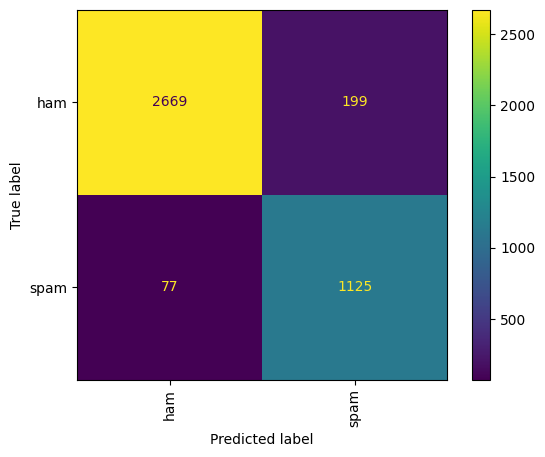

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [18]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x00000245764F0320>)),
                ('pca', TruncatedSVD(n_components=16279)),
                ('model', LogisticRegression(class_weight='balanced'))])